# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.

1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [190]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv("./data/airbnb_hw.csv")

# It seems that we need to cast the Price column to a string, then remove the commas, then cast it back
airbnb["Price"] = airbnb["Price"].str.replace(",", "")
airbnb["Price"] = pd.to_numeric(airbnb["Price"])

In [162]:
airbnb["Price"].dtype

dtype('int64')

In [163]:
airbnb[airbnb["Price"].isna()]

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

In [164]:
police = pd.read_csv("./data/mn_police_use_of_force.csv")
si = police["subject_injury"]

total_si_null = si.isna().sum()
total_si_not_null = si.notna().sum()

proportion = total_si_null / total_si_not_null
print("Proportion of NA to non-NA:", proportion)

# This proportion is a bit concerning, as if you wanted to use this value to derive trends from the data, you are going to have to drop a third of your dataset

Proportion of NA to non-NA: 3.200519987000325


In [165]:
police_cleaned = police.dropna(subset=["subject_injury"])
police_cleaned

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
9,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Crowd Control Mace,Black,Male,18.0,commission of crime,1,Downtown West
10,2016/01/01 02:38:23,Fight,No,DISCON,No,Chemical Irritant,Chemical Munitions,Black,Male,18.0,commission of crime,1,Downtown West
11,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East
12,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Joint Lock,Black,Male,21.0,Tensed,5,Lowry Hill East
13,2016/01/01 02:39:47,Suspicious Person,No,DISCON,Yes,Bodily Force,Body Weight to Pin,Black,Male,21.0,Tensed,5,Lowry Hill East
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2018/05/31 17:48:10,Traffic Law Enforcement,No,FLEE,Yes,Bodily Force,Push Away,Black,Male,15.0,Assaulted Officer,4,Jordan
4934,2018/06/01 12:37:52,Theft,No,FLEEFT,Yes,Taser,Firing Darts,Black,Male,42.0,Fled on Foot,3,Powderhorn Park
4936,2018/06/02 00:14:11,Bait Vehicle Auto Theft,No,AUTOTH,No,Bodily Force,Joint Lock,Black,Male,24.0,Fled in Vehicle,1,Loring Park
4937,2018/06/02 00:14:11,Bait Vehicle Auto Theft,No,AUTOTH,No,Gun Point Display,Compliance,Black,Male,24.0,Fled in Vehicle,1,Loring Park


In [166]:
# Inspect the columns for any missing values
police_cleaned[['subject_injury', 'force_type']].isna().sum()

cross_tab = pd.crosstab(police_cleaned['subject_injury'], police_cleaned['force_type'])

cross_tab

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [167]:
cross_tab_with_missing = pd.crosstab(police['subject_injury'], police['force_type'], dropna=False)

# Cross-tab with missing values
print(cross_tab_with_missing)

missing_data = police[police['subject_injury'].isna() | police['force_type'].isna()]
print(missing_data)

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                                  2                            0   
NaN                               

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [168]:
pretrial = pd.read_csv("./data/October 2017 Cohort_Virginia Pretrial Data Project_Deidentified FINAL Update_10272021.csv", low_memory=False)
column = "WhetherDefendantWasReleasedPretrial"

pretrial[column] = pd.to_numeric(pretrial[column], errors='coerce') # Coerce the variable to numeric

pretrial[column] = pretrial[column].apply(lambda x: x if x in [0, 1] else np.nan)
pretrial["WhetherDefendantWasReleasedPretrial_nan"] = pretrial["WhetherDefendantWasReleasedPretrial"].isnull()

pretrial[[column, "WhetherDefendantWasReleasedPretrial_nan"]]

,WhetherDefendantWasReleasedPretrial,WhetherDefendantWasReleasedPretrial_nan
0,NaN,True
1,0.0,False
2,0.0,False
3,0.0,False
4,1.0,False
...,...,...
22981,1.0,False
22982,1.0,False
22983,1.0,False
22984,1.0,False


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [169]:
imposed_numeric = pd.to_numeric(pretrial["ImposedSentenceAllChargeInContactEvent"], errors="coerce")

imposed_and_sentence_type = pd.DataFrame({
    "ImposedSentenceAllChargeInContactEvent": imposed_numeric,
    "SentenceTypeAllChargesAtConvictionInContactEvent": pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"]
})


imposed_null = imposed_and_sentence_type[imposed_and_sentence_type["ImposedSentenceAllChargeInContactEvent"].isnull()]
print(imposed_null["SentenceTypeAllChargesAtConvictionInContactEvent"].unique())
# Looking at this, we can see that the only values that have ImposedSentenceAllChargeInContactEvent as null are 9 and 4

[9 4]


In [170]:
zero_sentence = imposed_and_sentence_type.query("ImposedSentenceAllChargeInContactEvent == 0")
zero_sentence["SentenceTypeAllChargesAtConvictionInContactEvent"].unique()

array([0])

In [171]:
# Looking at the above findings, the only 0s in the column are for Probation/no incarceration. 
# It feels appropriate to make the SentenceTypeAllChargesAtConvictionInContactEvent==4 rows 0s as well, as all charges in cohort contact resulted in pending, dismissed, deferred, etc.
# However, the SentenceTypeAllChargesAtConvictionInContactEvent==9 should remain NaN, as the record was not found, or it is unknown, and giving it a value would feel dishonest, as no value represents the data better

# Replace all occurences with 4 as 0
imposed_and_sentence_type.loc[imposed_and_sentence_type["SentenceTypeAllChargesAtConvictionInContactEvent"]==4, "ImposedSentenceAllChargeInContactEvent"] = 0

# Replace all occurences with 9 as NaN (already like this but for peace of mind)
imposed_and_sentence_type.loc[imposed_and_sentence_type["SentenceTypeAllChargesAtConvictionInContactEvent"]==9, "ImposedSentenceAllChargeInContactEvent"] = np.nan

imposed_and_sentence_type

,ImposedSentenceAllChargeInContactEvent,SentenceTypeAllChargesAtConvictionInContactEvent
0,NaN,9
1,60.000000,0
2,12.000000,1
3,0.985626,1
4,0.000000,4
...,...,...
22981,0.000000,4
22982,NaN,9
22983,0.000000,4
22984,0.000000,4


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [172]:
%pip install xlrd


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [173]:
shark_attacks = pd.read_excel("./data/GSAF5.xls")
shark_attacks

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [193]:
shark_attacks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

In [174]:
print(shark_attacks["Unnamed: 21"].unique())
print(shark_attacks["Unnamed: 22"].unique())

# Only 1 occurence of 'stopped here', 'Teramo', and 'change filename' respectively
shark_attacks["Unnamed: 21"] = shark_attacks["Unnamed: 21"].replace('stopped here', np.nan)
shark_attacks["Unnamed: 22"] = shark_attacks["Unnamed: 22"].replace({'Teramo': np.nan, 'change filename': np.nan})

print(shark_attacks["Unnamed: 21"].unique())
print(shark_attacks["Unnamed: 22"].unique())

shark_attacks = shark_attacks.dropna(axis=1, how="all")

[nan 'stopped here']
[nan 'Teramo' 'change filename']
[nan]
[nan]


/var/folders/rw/kqv4w2bj5hx2v1ln61zfm4pr0000gn/T/ipykernel_25879/411289520.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shark_attacks["Unnamed: 21"] = shark_attacks["Unnamed: 21"].replace('stopped here', np.nan)
/var/folders/rw/kqv4w2bj5hx2v1ln61zfm4pr0000gn/T/ipykernel_25879/411289520.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shark_attacks["Unnamed: 22"] = shark_attacks["Unnamed: 22"].replace({'Teramo': np.nan, 'change filename': np.nan})


In [181]:
bad_years = shark_attacks[shark_attacks["Year"].isna() | (shark_attacks["Year"] > 2025.0)]
bad_years

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order


In [176]:
shark_attacks.iloc[27, shark_attacks.columns.get_loc("Year")] = 2024.0
shark_attacks.iloc[849, shark_attacks.columns.get_loc("Year")] = 2017.0
shark_attacks.iloc[6761, shark_attacks.columns.get_loc("Year")] = 1836.0

In [177]:
bad_years = shark_attacks[shark_attacks["Year"].isna() | (shark_attacks["Year"] > 2025.0)]
bad_years

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order


In [179]:
shark_attacks["Year"].describe()

# As you can see, there is a great range of years, going from "0" (before A.D.) all the way up to recently in Jan. 2025

count    6992.000000
mean     1935.015875
std       272.048122
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2025.000000
Name: Year, dtype: float64

In [188]:
%pip install matplotlib

  Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl (254 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.8 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)

[notice] A new release of pip is available: 24.3.1 -> 2

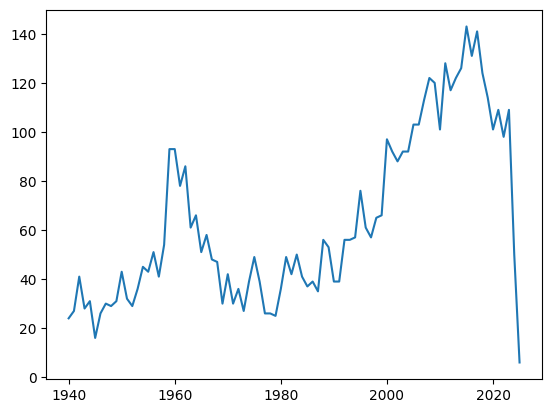

In [ ]:
import matplotlib.pyplot as plt
filtered_years = shark_attacks[shark_attacks["Year"] >= 1940]

attacks = filtered_years.groupby("Year").size()

plt.plot(attacks)
plt.show()

# The attacks seem to be steadily increasing over time from 1940 to ~2020, when there is a sharp drop off. This is most likely due to the pandemic keeping people inside during ~2020, then a sharper drop off that is probably caused by missing data, as this year has barely started.

In [228]:
ages = shark_attacks["Age"]
freq = ages.value_counts()

# Things to be fixed
# 20s -> 25 (average 20-30)
# 50s -> 55 (average 50-60)
# teen -> 16 (average 13-19)
# 40s -> 45 (average 40-50)
# 60s -> 65 (average 60-70)
# ? -> NaN (missing)
# young -> 10? 
# Any OR combo -> take average of all ages mentioned
# Any AND combo -> create new row with identical data
freq

Age
16             98
19             90
17             88
18             85
17             85
               ..
77              1
Teens           1
28, 23 & 30     1
46 & 34         1
13 or 14        1
Name: count, Length: 239, dtype: int64

In [232]:
replacements = {
    "20s": 25,
    "50s": 50,
    "teen": 16,
    "Teen": 16,
    "40s": 45,
    "60s": 65,
    "?": np.nan,
    "young": 10,
    "9 months":1,
    ">50": 55,
    "18 to 22": 20,
    "adult": 35,
    "(adult)": 35,
    '"middle-age"': 45,
    
}
shark_attacks["Age"] = shark_attacks["Age"].replace(replacements)

/var/folders/rw/kqv4w2bj5hx2v1ln61zfm4pr0000gn/T/ipykernel_25879/2136727884.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_attacks["Age"] = shark_attacks["Age"].replace(replacements)


In [236]:
# Function to check if a value is not an integer
def is_not_integer(value):
    try:
        int(value)
        return False
    except (ValueError, TypeError):
        return True

# Filter the Series to include only non-integer values
non_integers = ages[ages.apply(is_not_integer)].dropna()
non_integers

8              60+
26      Middle age
90             30s
95           20/30
116             !2
           ...    
5992      10 or 12
6163      31 or 33
6684            2½
6745        7 or 8
6955      13 or 14
Name: Age, Length: 85, dtype: object

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?